Loading Dataset

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [26]:
X, y = datasets.make_blobs(n_samples=1000, n_features=8, centers=2, cluster_std=1.05, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

Model

In [27]:
class Percepteron:
    def __init__(self, lr=.01, n_iters= 1000):
        self.lr = lr
        self.n_iters = n_iters
        self._activation = self._unit_step_func
        self.weights = None
        self.bias  = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        y_ = [1 if i>0 else 0 for i in y]
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_prediction = self._activation(linear_output)
                
                update = self.lr * (y_[idx] - y_prediction)
                deltaW = update * x_i
                self.weights += deltaW
                self.bias += update
                
    
    def predict(self, X):
        linear_out = np.dot(X, self.weights) + self.bias
        y_prediction = self._unit_step_func(linear_out)
        return y_prediction
    
    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)
    

Testing

In [28]:
def accuracy(y_true, y_pred):
    acc = np.sum(y_true == y_pred) / len(y_pred)
    return acc

In [29]:
pr = Percepteron()
pr.fit(X_train, y_train)
predictions = pr.predict(X_test)
accuracy(y_test, predictions)

1.0

Plot

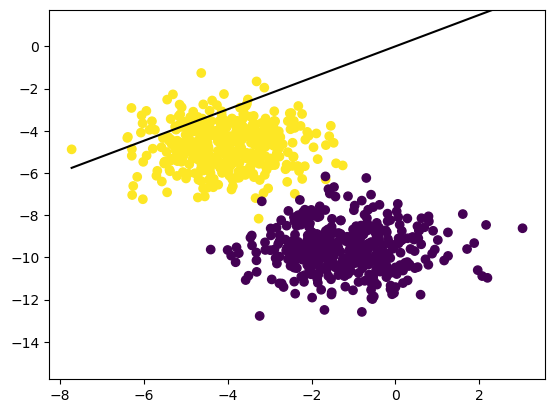

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1], marker='o', c=y_train)

x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1 = (-pr.weights[0] * x0_1 - pr.bias) / pr.weights[1]
x1_2 = (-pr.weights[0] * x0_2 - pr.bias) / pr.weights[1]

ax.plot([x0_1,x0_2], [x1_1,x1_2], 'k')

ymin = np.amin(X_train[:,1])
ymax = np.amax(X_train[:,1])

ax.set_ylim([ymin-3, ymax+3])
plt.show()